# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [131]:
#Takes a date as a string, and returns a Python datetime object
def returnDate(date):
    return pd.to_datetime(date)

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, we will load the data in and check it!

### General Properties

In [132]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df_m =df.copy()

In [133]:
df_m.shape

(10866, 21)

We have 10866 movies!

In [134]:
df_m.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [135]:
df_m.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


### Data Cleaning
Here we can see that the release_date is in String format so we change it to Date type using the function created previously, returnDate.

In [137]:
df_m['release_date'] = returnDate(df_m['release_date'])

In [138]:
df_m.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

###First Data Cleaning

I am going to drop all the columns that won't affect our analysis

Since we are working with genres, budget_adj, revenue_adj, release_year, popularity, vote_average
, we will drop id, imdb_id, budget_revenue, cast, homepage, director, homepage, tagline, keywords, overview,  production_companies, runtim, release_date, vote_count

In [139]:
df_m = df_m.drop(columns = ['id','imdb_id', 'budget','revenue','cast','director','homepage', 'tagline','keywords','overview','runtime','production_companies','release_date', 'vote_count' ])

Now, we have to check if there are any missing values.

In [140]:
df_m.isnull().any(axis=0)

popularity        False
original_title    False
genres             True
vote_average      False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

It's no obvious that only genres have missing values so we go and count them

In [141]:
df_m['genres'].isnull().sum()

23

We have only 23 movies out of 10866 that have missing value so we can go and remove them as they won't affect our analysis

In [142]:
df_m.dropna(inplace= True)

In [143]:
df_m.shape

(10843, 7)

Next step is to check for duplicates

In [144]:
df_m[df_m.duplicated()]

,popularity,original_title,genres,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,TEKKEN,Crime|Drama|Action|Thriller|Science Fiction,5.0,2010,30000000.0,967000.0


Now we remove duplicate rows and remove them!

In [145]:
df_m.drop_duplicates(inplace= True)

In [146]:
df_m.head()

,popularity,original_title,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


Here we divide movies into two databases movies with one genre and movies with more than one genre
df_m_1 dataframe full of movies with more than one genre
df_m_2 dataframe full of movies with onely one genre

In [147]:
df_m_1 = df_m[df_m['genres'].str.contains('|')]
df_m_2 = df_m[df_m['genres'].str.contains('|') == False]

and here we create another data frame (df_f) of all movies containing movies with more than one genre as multiple entries and movies with only one genre

In [148]:
df_f=pd.DataFrame()
df_empty = pd.DataFrame()
for index, movie in df_m_1.iterrows():
    df_empty = pd.DataFrame()
    for i in range(len(movie['genres'].split('|'))):
        df_empty=df_empty.append(movie,ignore_index=True)
        df_empty.loc[i,'genres'] = movie['genres'].split('|')[i]
         #= movie['genres'].split('|')[i]
    df_f = df_f.append(df_empty)
    del df_empty

In [149]:
df_all = df_f.append(df_m_2, ignore_index = True, sort= False)


In [150]:
df_all.to_csv('with_genres.csv', index = False)

Now we need to calculate the profitability for each movie! (revenue_adj-budget_adj)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which genre make the greatest revenue?)

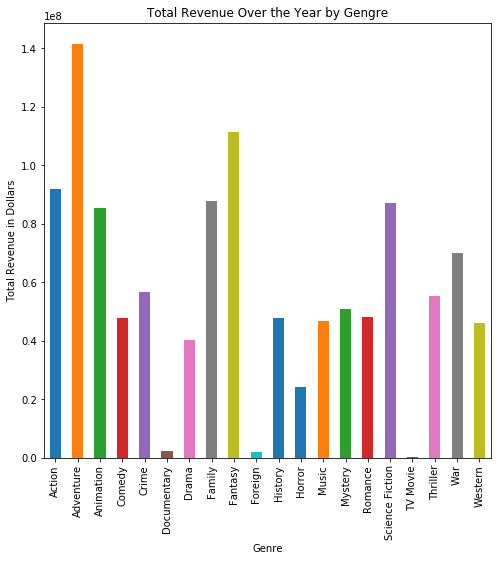

In [151]:
ax = df_all.groupby('genres')['revenue_adj'].mean().plot(kind = 'bar', title = 'Total Revenue Over the Year by Gengre', 
                                                 figsize = (8,8))
ax.set_xlabel('Genre')
ax.set_ylabel('Total Revenue in Dollars');



We can say that Adventure movies make the most revenues followed by fantasy and action

### Research Question 2  (Which genre cost the most?)

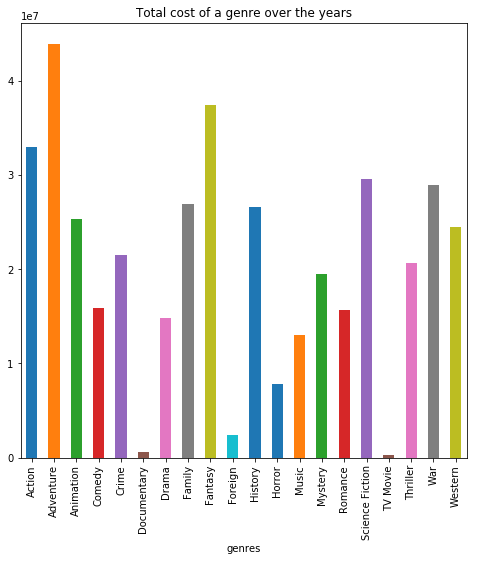

In [152]:
ax2 = df_all.groupby('genres')['budget_adj'].mean().plot(kind = 'bar', 
                                                        title = 'Total cost of a genre over the years',  figsize = (8,8))
ax2.set_xlabel = 'Genre'
ax2.set_ylabel = 'Cost in dollars';

We can say that adventure movies cost the most followed by fantasy and  action!

In [153]:
df_all.groupby('release_year')['genres'].describe()

,count,unique,top,freq
release_year,,,,
1960.0,78,16,Drama,13
1961.0,75,17,Drama,16
1962.0,82,17,Drama,21
1963.0,91,17,Drama,13
1964.0,111,18,Drama,20
1965.0,94,18,Drama,20
1966.0,119,18,Comedy,16
1967.0,98,17,Comedy,17
1968.0,92,17,Drama,20


We can see that Drama movies are more common over the years that any other genre(followed by Comedy movies).

Text(0,0.5,'vote_average')

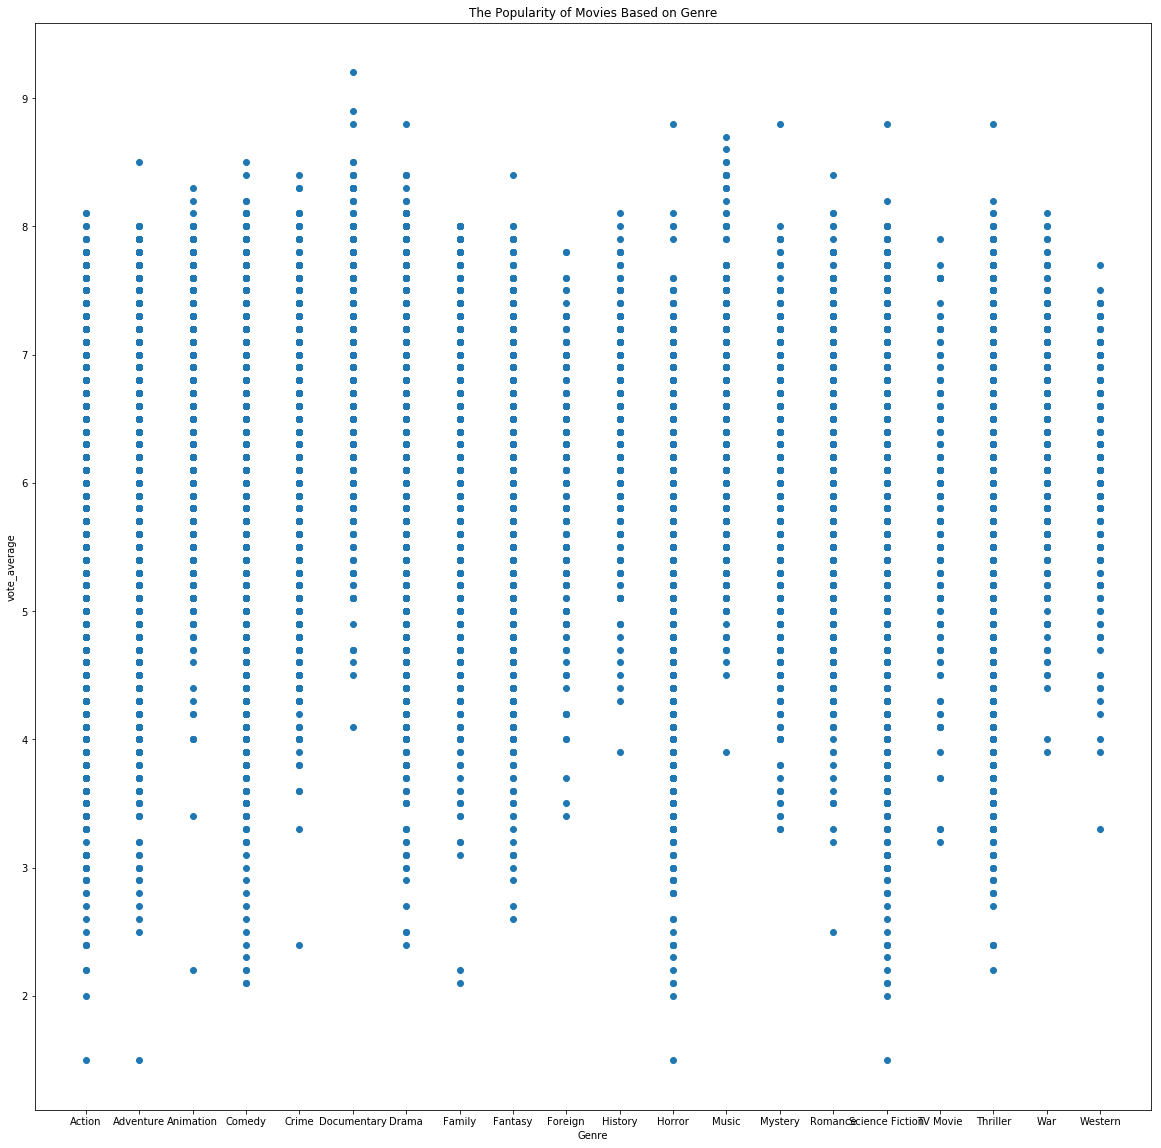

In [161]:
plt.figure(figsize=(20,20))
plt.scatter(x = df_all['genres'], y= df_all['vote_average'])
plt.title('The Popularity of Movies Based on Genre')
plt.xlabel('Genre')
plt.ylabel('vote_average')


Given the data above we can say that action, adventure and science ficiton are most popular(ignoring the outliers)

<a id='conclusions'></a>
## Conclusions
We can undoubtly say that movies with bigger budget are more likely to generate more revenues but not the same with popularity. We can also say that the number of movies per certain genre doesn't affect the vote average. We can also assume that movies with more revenues don't have to be the movies with the higher vote but with higher budget.

>> Limitations
The popularity factor here isn't clear how it's calculated and if depends on the number of votes or the vote itself or the budget.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])